In [33]:
import sys
!{sys.executable} -m pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 9.4 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=0164ad4f13bd3a7f3f24de9b3b7f37c5759254cbdd0881423ad8bcb2f6191bc1
  Stored in directory: /mmfs1/home/hongrach/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [38]:
import os
import compress_pickle as pickle
from tqdm import tqdm
import lz4.frame
import pandas as pd
from iso639 import languages
from langdetect import detect
import matplotlib.pyplot as plt


# Import datasets

## LibriVox (Books)

In [10]:
data_file = '/gscratch/scrubbed/wagnew2/audio_transcripts/librivox_all_transcripts.lz4'
try:
    audio_info=pickle.load(data_file)
except Exception as e:
    print("ERROR", e)
librivox_df = pd.DataFrame({'transcript': audio_info})
librivox_df

,transcript
0,\r\n\r\n\r\nE-text prepared by Juliet Sutherla...
1,\r\n\r\n\r\n\r\n\r\nProduced by Judith Boss\r\...
2,\r\n\r\n\r\n\r\n\r\n\r\n\r\nTranscribed from t...
3,\r\n\r\n\r\n\r\n\r\nProduced by Lionel G. Sear...
4,"\r\n\r\n\r\n\r\n\r\nProduced by Greg Weeks, Jo..."
...,...
1479,and with\r\nalmost no restrictions whatsoever....
1480,\r\n\r\n\r\nThe Narrative of Sojourner Truth\r...
1481,to check the\r\ncopyright laws for your count...
1482,is for the use of anyone anywhere at no cost ...


## VCTK (News)

In [14]:
data_file = '/gscratch/scrubbed/wagnew2/audio_transcripts/vctk_all_transcripts.lz4'
try:
    audio_info=pickle.load(data_file)
except Exception as e:
    print("ERROR", e)
vctk_df = pd.DataFrame({'transcript': audio_info})
vctk_df

In [16]:
vctk_df = pd.DataFrame({'transcript': audio_info})
vctk_df

,transcript
0,I see no reason for them to be.\n
1,It might not survive the process.\n
2,It isn't a happy memory.\n
3,Sergio was talking his chances down yesterday.\n
4,They agree to meet.\n
...,...
44578,IT had to happen.\n
44579,He said nothing of the sort.\n
44580,Yet the improvement in behaviour was huge.\n
44581,"Once again, he refused.\n"


## LAKH

In [18]:
data_file = '/gscratch/scrubbed/wagnew2/audio_transcripts/lakh_all_transcripts.lz4'
try:
    audio_info=pickle.load(data_file)
except Exception as e:
    print("ERROR", e)
lakh_df = pd.DataFrame({'transcript': audio_info})
lakh_df

,transcript
0,All rights reserved \r I still be lieve in ...
1,KIND NESS \r IN YOUR EYES \r I GUESS \r YOU...
2,Ð ôÌ n g q u ê t a m ê n h m ô n g \r\...
3,H aÌ T i ê n õ i ð âì t \r\n ð eò p n ...
4,ALL rights reserved. \r You're run ning wild...
...,...
23565,N ãì n g x u â n r õ i r õì t \r\n t r ê...
23566,\r I'm gon na make a change \r for once ...
23567,\r Here we are in the room full of str...
23568,"A p pro chez, é cou tez l'his toire \r Sor ..."


## Mozilla

In [7]:
data_file = '/gscratch/scrubbed/wagnew2/cv-corpus-17.0-2024-03-15/en/train.tsv'
try:
    mozilla_df=pd.read_csv(data_file, sep='\t')
except Exception as e:
    print("ERROR", e)

mozilla_df['transcript'] = mozilla_df['sentence']
mozilla_df

/tmp/ipykernel_80979/3649609654.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  mozilla_df=pd.read_csv(data_file, sep='\t')


,client_id,path,sentence_id,sentence,sentence_domain,up_votes,down_votes,age,gender,accents,variant,locale,segment
0,f15d2e0fd19c04421174108a8c02c3c2ef8e76365cdcc4...,common_voice_en_17924809.mp3,05001a328ff9f6589eb0ca7b8df65cd9662698a85e204e...,"Every evening, the dogs in our neighbourhood a...",NaN,2,0,NaN,NaN,NaN,NaN,en,NaN
1,f1619cc90b57fc09cad0f22e0034b9b70f9e1730043bba...,common_voice_en_19612700.mp3,1ad0ca90c9d90d3864a07ffe269d29cf746d810d7471b2...,A donor has since been found.,NaN,2,0,NaN,NaN,NaN,NaN,en,NaN
2,f1619cc90b57fc09cad0f22e0034b9b70f9e1730043bba...,common_voice_en_19612701.mp3,1ad9e86d5d4886d66460e453a00e844fee8b48dfc7d589...,New York at that time had become a premier cen...,NaN,2,1,NaN,NaN,NaN,NaN,en,NaN
3,f1619cc90b57fc09cad0f22e0034b9b70f9e1730043bba...,common_voice_en_19612703.mp3,1ae9db10a316627e0045280707d781f04f1a9f52537d4a...,Weise proceeded into the main corridor of the ...,NaN,2,1,NaN,NaN,NaN,NaN,en,NaN
4,f161e283a59077cdca316bcf7e2f46021a30a163548197...,common_voice_en_212609.mp3,0438b75e57e8141ec5080893c825da6c301342a5b5b1cc...,When can I see him?,NaN,2,1,NaN,NaN,NaN,NaN,en,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1100821,372293e65cdab88771e028a4351651ab2eff64438ddafc...,common_voice_en_40137091.mp3,e9943928afa82f1bf7cd21f1af93bd85bd84787d801b9e...,Invited to speak about her life at many events...,NaN,2,0,fifties,male_masculine,"German English,Non native speaker",NaN,en,NaN
1100822,372293e65cdab88771e028a4351651ab2eff64438ddafc...,common_voice_en_40137115.mp3,e96ad5ab6c411a3df475e89b0d6ad88a0aa5786023ce4d...,"Examples include Slashdot, LiveJournal, BlogSpot.",NaN,2,0,fifties,male_masculine,"German English,Non native speaker",NaN,en,NaN
1100823,372293e65cdab88771e028a4351651ab2eff64438ddafc...,common_voice_en_40165947.mp3,e9c54968c877c8a0d16bbb33cc5c7d7a583ebdf47c0766...,"Kirkbride was born in Halifax, West Riding of ...",NaN,2,0,fifties,male_masculine,"German English,Non native speaker",NaN,en,NaN
1100824,372293e65cdab88771e028a4351651ab2eff64438ddafc...,common_voice_en_40166196.mp3,e9c377663e2d2c92fb8fb3cbfbddd3ea544b0f30581e48...,From that time until now the cover changed eac...,NaN,4,0,fifties,male_masculine,"German English,Non native speaker",NaN,en,NaN


## AudioSet

In [22]:
parquet_dir = '/gscratch/jamiemmt/hongrach/source_tar/audioset_parquets/'

audioset_df = None
for filename in os.listdir(parquet_dir):
    filepath = os.path.join(parquet_dir, filename)
    file_df = pd.read_parquet(filepath, engine='pyarrow')
    if audioset_df is None:
        audioset_df = file_df
    else:
        audioset_df = pd.concat([audioset_df, file_df], ignore_index=True)
audioset_df

,wada_snr,audio_tags,transcript,langauge,music_info,yt_id,yt_title,yt_description,yt_channel_url,yt_duration,...,yt_age_limit,yt_webpage_url,yt_categories,yt_tags,yt_release_timestamp,yt_like_count,yt_upload_date,yt_original_url,yt_release_year,yt_language
0,[1.4020783 1.4020779 1.4020783 ... 1.4020779 1...,"[('Singing', 1.0), ('Music', 1.0)]",ก็จะมาดีวะห้องกับเธอในนอนดูแม่อ้อนจอนกูดีไม่ห่...,th,{},vt4NrsKsqaE,เพลงพื้นบ้านซอสตริง3.MPG,,https://www.youtube.com/channel/UCzHJLEpk5JJtI...,283.0,...,0.0,https://www.youtube.com/watch?v=vt4NrsKsqaE,['People & Blogs'],['เพลงพื้นบ้านซอสตริง3'],nan,35.0,20100328,https://www.youtube.com/watch?v=vt4NrsKsqaE,nan,None
1,[2.267552 2.267552 2.2675521 ... 2.267552 2...,"[('Music', 1.0)]",¶¶,en,{},8uOeNnmy9tg,The Legend of Zelda The Wind Waker Walkthrough...,Link finally is back to save the princess! He ...,https://www.youtube.com/channel/UCCSy1DmeNRbP3...,488.0,...,0.0,https://www.youtube.com/watch?v=8uOeNnmy9tg,['Entertainment'],"['The', 'Legend', 'of', 'Zelda', 'Wind', 'Wake...",nan,18.0,20090817,https://www.youtube.com/watch?v=8uOeNnmy9tg,nan,None
2,[17.46137 17.46137 17.46137 ... 17.46137 17.46...,"[('Speech', 1.0)]","При этом быть уверенным, что так слишком разо...",ru,None,UxMxcan8NcU,Поворот оверштаг. Учебное видео.,Учебное видео. Управление парусной яхтой. Пово...,https://www.youtube.com/channel/UCcU8Xk_PAVc7m...,226.0,...,0.0,https://www.youtube.com/watch?v=UxMxcan8NcU,['Sports'],"['Capschool', 'стаксель шкот', 'школа капитано...",nan,263.0,20120131,https://www.youtube.com/watch?v=UxMxcan8NcU,nan,None
3,[3.2863274 3.286327 3.2863274 ... 3.2863274 3...,"[('Echo', 1.0), ('Music', 1.0)]",¶¶,en,{},EF8Ow732-m8,Echo of Soul OST - Mnes Forest,My Channel ► https://www.youtube.com/yueyen\nT...,https://www.youtube.com/channel/UCI6ZwAjtHzmtZ...,100.0,...,0.0,https://www.youtube.com/watch?v=EF8Ow732-m8,['Music'],"['Echo of Soul', 'OST', 'BGM', 'Mnes', 'Forest']",nan,10.0,20140906,https://www.youtube.com/watch?v=EF8Ow732-m8,nan,None
4,[4.872159 4.8721595 4.8721585 ... 4.8721585 4...,"[('Music', 1.0)]","So what now, steer it up Little darling, stee...",en,{},1RJhVGw9Qdw,Vince Irie - Wonderwall - Stir It Up | The Voi...,The Voice Of Holland zie je elke vrijdag om 20...,https://www.youtube.com/channel/UC56iCN_Wb1Z4F...,107.0,...,0.0,https://www.youtube.com/watch?v=1RJhVGw9Qdw,['Music'],[],nan,2036.0,20130907,https://www.youtube.com/watch?v=1RJhVGw9Qdw,nan,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111502,[23.649025 23.649025 23.649025 ... 23.649025 2...,"[('Speech', 1.0), ('Inside, small room', 1.0)]","Yeah! Congrats! Okay, now it's my turn for ve...",en,None,hz-X-DEGFLk,J-Server Plays Zombie Master Vid1,"The J-server gang hop onto zombie master, an o...",https://www.youtube.com/channel/UCY63DNbVREJIa...,509.0,...,0.0,https://www.youtube.com/watch?v=hz-X-DEGFLk,['Gaming'],"['Zombie Master', 'HL2 Mod', 'J-Server', 'Rain...",nan,13.0,20100322,https://www.youtube.com/watch?v=hz-X-DEGFLk,nan,en
111503,[17.805056 17.805056 17.805056 ... 17.805056 1...,"[('Music', 1.0), ('Speech', 1.0)]",Another cool feature of the ST30 is the Smart...,en,{},GDiU0ixUafw,Samsung ST30,La cámara compacta más pequeña del mercado!!,https://www.youtube.com/channel/UCSiY1dlUP6BIC...,144.0,...,0.0,https://www.youtube.com/watch?v=GDiU0ixUafw,['Science & Technology'],"['camara', 'samsung', 'compacta', 'st30']",nan,13.0,20110609,https://www.youtube.com/watch?v=GDiU0ixUafw,nan,en
111504,[-20.000002 -20.000002 -20.000002 ... -20.0000...,"[('Siren', 1.0), ('Civil defense siren', 1.0)]",.,en,None,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
111505,[20.863543 20.863543 20.863543 ... 20.863543 2...,"[('Music', 1.0), ('Speech', 1.0)]","voy a hacer que respires, pero es lo que yo s...",es,{},kPxSEsi9qeg,Primeros auxilios Radio Metro El Parquimetro 2,"Judith Wilhelm, instructora de primeros auxili...",https://www.youtube.com/channel/UCi9kxE8azxZBM...,608.0,...,0.0,https://ww

In [28]:
def get_full_lang(lang):
    full_lang = None
    if lang == 'None':
        return full_lang

    try:
        full_lang = languages.get(alpha2=lang).name
    except Exception as e:
        if lang == 'jw':
            full_lang = 'Javanese'
        elif lang == 'haw':
            full_lang = 'Hawaiian'
        elif lang == 'iw':
            full_lang = 'Modern Hebrew'
        else:
            print(lang, e)
    return full_lang

audioset_df['full_language'] = audioset_df['langauge'].apply(get_full_lang)

## Aggregate

In [25]:
ALL_DFS = {
    'LibriVox': librivox_df,
    'Mozilla': mozilla_df,
    'VCTK': vctk_df,
    'LAKH': lakh_df,
    'AudioSet': audioset_df
}

In [40]:
len(mozilla_df)

1100826

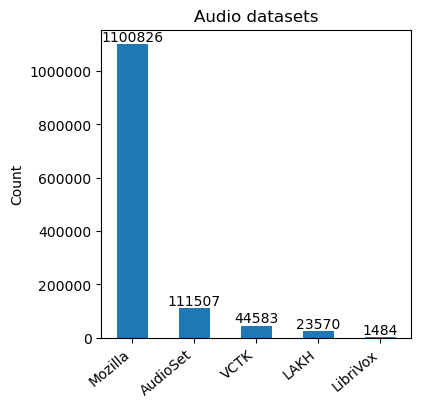

In [51]:
plot_df = pd.DataFrame({
    'dataset':list(ALL_DFS.keys()),
    'count': [len(ALL_DFS[d]) for d in ALL_DFS],
})

barplot = plot_df.sort_values('count', ascending=False).plot(
    kind='bar',y='count',x='dataset', legend=False,
    figsize=(4, 4)
)
plt.ticklabel_format(style='plain', useOffset=False, axis='y')
plt.title('Audio datasets')
plt.xlabel('')
plt.ylabel('Count')
plt.xticks(rotation=40, ha='right')
plt.bar_label(barplot.containers[0], fmt = '%d')
plt.show()

# Language

In [35]:
def get_language(caption):
    name = None
    try:
        lang = detect(caption)
        name = languages.get(alpha2=lang[:2]).name
    except Exception as e:
        raise Exception
    return name

def get_lang_dict(langs):
    lang_dict = defaultdict(float)
    for lang in langs:
        lang_dict[lang] += 1.0 / len(langs)
    return lang_dict

In [36]:
for dataset in ALL_DFS:
    df = ALL_DFS[dataset]
    if dataset != 'AudioSet':
        print(dataset)
        df['full_language'] = df['transcript'].apply(get_language)

LibriVox
Mozilla


KeyboardInterrupt: 

In [ ]:
for dataset in ALL_DFS:
    df = ALL_DFS[dataset]

    
    barplot = df['full_language'].value_counts()[:15].plot(kind='bar', figsize=(8, 4))

    plt.title('Top 15 languages')
    plt.ylabel('Count (out of 9075)')
    plt.bar_label(barplot.containers[0],)
    plt.xticks(rotation=40, ha='right')
    plt.show()
    else:
        pass

# Create AudioSet (YouTube)

In [2]:
data_dir="/gscratch/scrubbed/wagnew2/audioset/audio/unbal_train"
metadata_dir="/gscratch/scrubbed/wagnew2/audioset_info/"

YT_KEYS = [
    'id', 'title', 'description', 'channel_url', 'duration', 'age_limit', 'webpage_url', 'original_url',
    'categories', 'tags', 'release_timestamp', 'release_year', 'upload_date', 'language', 'view_count', 'like_count'
]
KEYS = ['wada_snr', 'audio_tags', 'transcript', 'langauge', 'music_info']

In [ ]:
count = 0
info_dicts = []

for audio_info_file in (os.listdir(data_dir)):
    if audio_info_file[-4:]=='.lz4':
        try:
            audio_info=pickle.load(os.path.join(data_dir, audio_info_file))
            if isinstance(audio_info, dict):    
                info_dict = {}
                for key in audio_info:
                    if key in KEYS:
                        info_dict[key] = audio_info[key]

                metadata_path = os.path.join(metadata_dir, audio_info_file.split('_')[0] + '_metadata.lz4')
                if os.path.isfile(metadata_path):
                    metadata_info=pickle.load(metadata_path)
                    if isinstance(metadata_info, dict):
                        for key in metadata_info['yt_info']:
                            if key in YT_KEYS:
                                info_dict['yt_' + key] = metadata_info['yt_info'][key]
                    info_dicts.append(info_dict)
        except Exception as e:
            print("ERROR", e)
        count += 1
        if count % 1000 == 0:
            print(count)
        if count % 10000 == 0:
            batch_num= int(count/10000)
            print("SAVING...", batch_num)
            df = pd.DataFrame(info_dicts)
            df.astype(str).to_parquet('/gscratch/jamiemmt/hongrach/source_tar/audioset_parquets/audioset_' + str(batch_num) + '.parquet')
            info_dicts = []
count

In [ ]:
count

In [ ]:
parquet_dir = '/gscratch/jamiemmt/hongrach/source_tar/audioset_parquets/'

df = None
for filename in os.listdir(parquet_dir):
    filepath = os.path.join(parquet_dir, filename)
    file_df = pd.read_parquet(filepath, engine='pyarrow')
    if df is None:
        df = file_df
    else:
        df = pd.concat([df, file_df], ignore_index=True)

In [ ]:
df

In [ ]:
audio_info.keys()

In [ ]:
audio_info['yt_info'].keys()